# Data Mining Project  (Personal Key Indicators of Heart Disease)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#train">Training and Testing sets</a></li>

<a id='intro'></a>
## Introduction

The dataset come from the CDC (Centers For Disease Control Prevention) and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents.

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease:

-High blood pressure

-High cholesterol

-Smoking

Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

### Dataset attributes

● **HeartDisease**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

● **BMI**: Body Mass Index.

● **Smoking**: Have you smoked at least 100 cigarettes in your entire life?

● **AlcoholDrinking**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.

● **Stroke**: Ever told you had a stroke?

● **PhysicalHealth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30.

● **MentalHealth**: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

● **DiffWalking**: Do you have serious difficulty walking or climbing stairs?

● **Sex**: Male or Female?

● **AgeCategory**: Fourteen-level age range.

● **Race(strain)**: Imputed race/ethnicity value.

● **Diabetic**: Ever told you have Diabetes?

● **PhysicalActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

● **GenHealth**: Your general health is... (Poor,Fair,Good,Very good,Excellent).

● **SleepTime**: On average, how many hours of sleep do you get in a 24-hour period?

● **Asthma**: Ever told you had asthma?

● **KidneyDisease**: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

● **SkinCancer** : Ever told you had skin cancer?


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np 
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings('ignore')

 <a id='wrangling'></a>
## Data Wrangling Phase
**A phase were the process of cleaning, organizing, and unifying raw, complex, unorganized data sets is done so that they are more accessible for future data analysis.**


>**steps**: 
            <li><a href="#Loading dataset">Loading Dataset </a></li>
            <li><a href="#Display"> Display Data Content </a></li>
            <li><a href="#prop "> General Data Properties </a></li>
            <li><a href="#clean "> Cleaning Phase  </a></li>

 <a id='Loading dataset'></a>
# Loading  Dataset 

In [2]:
data=pd.read_csv("E:\heart_2020_cleaned.csv")

<a id='Display'></a>

# Diplay Data Content 

In [3]:
data.head(15)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0            No  16.60     Yes              No     No             3.0   
1            No  20.34      No              No    Yes             0.0   
2            No  26.58     Yes              No     No            20.0   
3            No  24.21      No              No     No             0.0   
4            No  23.71      No              No     No            28.0   
5           Yes  28.87     Yes              No     No             6.0   
6            No  21.63      No              No     No            15.0   
7            No  31.64     Yes              No     No             5.0   
8            No  26.45      No              No     No             0.0   
9            No  40.69      No              No     No             0.0   
10          Yes  34.30     Yes              No     No            30.0   
11           No  28.71     Yes              No     No             0.0   
12           No  28.37     Yes              No     No             0.0   
13           No  28.15      No              No     No             7.0   
14           No  29.29     Yes              No     No             0.0   

    MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0           30.0          No  Female        55-59  White   
1            0.0          No  Female  80 or older  White   
2           30.0          No    Male        65-69  White   
3            0.0          No  Female        75-79  White   
4            0.0         Yes  Female        40-44  White   
5            0.0         Yes  Female        75-79  Black   
6            0.0          No  Female        70-74  White   
7            0.0         Yes  Female  80 or older  White   
8            0.0          No  Female  80 or older  White   
9            0.0         Yes    Male        65-69  White   
10           0.0         Yes    Male        60-64  White   
11           0.0          No  Female        55-59  White   
12           0.0         Yes    Male        75-79  White   
13           0.0         Yes  Female  80 or older  White   
14          30.0         Yes  Female        60-64  White   

                   Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                       Yes              Yes  Very good        5.0    Yes   
1                        No              Yes  Very good        7.0     No   
2                       Yes              Yes       Fair        8.0    Yes   
3                        No               No       Good        6.0     No   
4                        No              Yes  Very good        8.0     No   
5                        No               No       Fair       12.0     No   
6                        No              Yes       Fair        4.0    Yes   
7                       Yes               No       Good        9.0    Yes   
8   No, borderline diabetes               No       Fair        5.0     No   
9                        No              Yes       Good       10.0     No   
10                      Yes               No       Poor       15.0    Yes   
11                       No              Yes  Very good        5.0     No   
12                      Yes              Yes  Very good        8.0     No   
13                       No               No       Good        7.0     No   
14                       No               No       Good        5.0     No   

   KidneyDisease SkinCancer  
0             No        Yes  
1             No         No  
2             No         No  
3             No        Yes  
4             No         No  
5             No         No  
6             No        Yes  
7             No         No  
8            Yes         No  
9             No         No  
10            No         No  
11            No         No  
12            No         No  
13            No         No  
14            No         No

<a id='prop'></a>

# General Properties : 

In [4]:
#number of rows and columns
data.shape

(319795, 18)

In [5]:
#data types and checking of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**No missing values** 

In [6]:
#some statistical Values
data.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

**There is an error in "SleepTime" column as its maximum value is 24 hours and that's immpossible (will be handled in data cleaning phase)**

<a id='clean'></a>

# Cleaning Phase

In [7]:
#checking wether data have duplicated rows or not.
data.duplicated().sum()

18078

**There are 18078 duplicated rows that we have to drop**

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

**No more duplicated rows**

In [10]:
#checking for errors in data entry
error = data.query("PhysicalHealth==0")
error

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
1                No  20.34      No              No    Yes             0.0   
3                No  24.21      No              No     No             0.0   
8                No  26.45      No              No     No             0.0   
9                No  40.69      No              No     No             0.0   
11               No  28.71     Yes              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319789           No  22.22      No              No     No             0.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race  \
1                0.0          No  Female  80 or older     White   
3                0.0          No  Female        75-79     White   
8                0.0          No  Female  80 or older     White   
9                0.0         Yes    Male        65-69     White   
11               0.0          No  Female        55-59     White   
...              ...         ...     ...          ...       ...   
319789           0.0          No  Female        18-24  Hispanic   
319791           0.0          No    Male        35-39  Hispanic   
319792           0.0          No  Female        45-49  Hispanic   
319793           0.0          No  Female        25-29  Hispanic   
319794           0.0          No  Female  80 or older  Hispanic   

                       Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
1                            No              Yes  Very good        7.0     No   
3                            No               No       Good        6.0     No   
8       No, borderline diabetes               No       Fair        5.0     No   
9                            No              Yes       Good       10.0     No   
11                           No              Yes  Very good        5.0     No   
...                         ...              ...        ...        ...    ...   
319789                       No              Yes  Excellent        8.0     No   
319791                       No              Yes  Very good        5.0    Yes   
319792                       No              Yes       Good        6.0     No   
319793                       No               No       Good       12.0     No   
319794                       No              Yes       Good        8.0     No   

       KidneyDisease SkinCancer  
1                 No         No  
3                 No        Yes  
8                Yes         No  
9                 No         No  
11                No         No  
...              ...        ...  
319789            No         No  
319791            No         No  
319792            No         No  
319793            No         No  
319794            No         No  

[208611 rows x 18 columns]

**There are 226589 rows containing 0 value of 'PhysicalHealth' attribute so, column must be dropped as it will ruin the analysis process**

In [11]:
data.drop('PhysicalHealth',axis=1,inplace=True)

In [12]:
#checking for errors in data entry
error = data.query("MentalHealth==0")
error

HeartDisease    BMI Smoking AlcoholDrinking Stroke  MentalHealth  \
1                No  20.34      No              No    Yes           0.0   
3                No  24.21      No              No     No           0.0   
4                No  23.71      No              No     No           0.0   
5               Yes  28.87     Yes              No     No           0.0   
6                No  21.63      No              No     No           0.0   
...             ...    ...     ...             ...    ...           ...   
319790          Yes  27.41     Yes              No     No           0.0   
319791           No  29.84     Yes              No     No           0.0   
319792           No  24.24      No              No     No           0.0   
319793           No  32.81      No              No     No           0.0   
319794           No  46.56      No              No     No           0.0   

       DiffWalking     Sex  AgeCategory      Race Diabetic PhysicalActivity  \
1               No  Female  80 or older     White       No              Yes   
3               No  Female        75-79     White       No               No   
4              Yes  Female        40-44     White       No              Yes   
5              Yes  Female        75-79     Black       No               No   
6               No  Female        70-74     White       No              Yes   
...            ...     ...          ...       ...      ...              ...   
319790         Yes    Male        60-64  Hispanic      Yes               No   
319791          No    Male        35-39  Hispanic       No              Yes   
319792          No  Female        45-49  Hispanic       No              Yes   
319793          No  Female        25-29  Hispanic       No               No   
319794          No  Female  80 or older  Hispanic       No              Yes   

        GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
1       Very good        7.0     No            No         No  
3            Good        6.0     No            No        Yes  
4       Very good        8.0     No            No         No  
5            Fair       12.0     No            No         No  
6            Fair        4.0    Yes            No        Yes  
...           ...        ...    ...           ...        ...  
319790       Fair        6.0    Yes            No         No  
319791  Very good        5.0    Yes            No         No  
319792       Good        6.0     No            No         No  
319793       Good       12.0     No            No         No  
319794       Good        8.0     No            No         No  

[187898 rows x 17 columns]

**There are 205401 rows containing 0 value of 'MentalHealth' attribute So, column must be dropped as it will ruin the analysis process**

In [13]:
data.drop('MentalHealth',axis=1,inplace=True)

In [14]:
#How many rows do contain 24 hrs "SleepTime" entry?
error = data.query("SleepTime==24")
error

HeartDisease    BMI Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
12339            No  28.15     Yes              No     No          No  Female   
15736           Yes  24.41      No              No     No         Yes  Female   
17845            No  38.09      No              No     No         Yes  Female   
28794            No  28.51      No              No    Yes         Yes    Male   
37508            No  48.82      No              No     No          No    Male   
40015            No  36.36     Yes              No     No         Yes  Female   
40288            No  21.46      No              No     No         Yes  Female   
40858            No  31.09      No              No     No         Yes  Female   
43212           Yes  29.05     Yes              No     No          No  Female   
44608            No  32.50      No              No     No          No    Male   
52970            No  45.04      No              No     No         Yes    Male   
63281            No  27.37     Yes             Yes     No          No    Male   
90985            No  46.94     Yes              No     No         Yes  Female   
101359           No  38.89      No              No     No          No    Male   
102691           No  25.04      No              No    Yes          No    Male   
119663          Yes  22.67     Yes              No     No         Yes  Female   
120188           No  32.61      No              No     No          No  Female   
134017           No  35.43      No              No     No          No  Female   
163829          Yes  54.91     Yes             Yes     No         Yes    Male   
191913           No  29.18      No             Yes     No          No    Male   
220180           No  27.41     Yes              No     No         Yes    Male   
223641           No  25.09     Yes              No     No         Yes    Male   
225626          Yes  35.25     Yes              No     No         Yes    Male   
248202           No  24.75      No              No     No          No    Male   
248700           No  43.05      No              No     No          No  Female   
264143          Yes  36.90      No              No     No         Yes  Female   
273779           No  30.92      No              No     No          No    Male   
307770           No  37.41      No              No     No          No  Female   
309745           No  19.64      No              No     No          No  Female   
310560           No  29.84      No              No     No          No  Female   

        AgeCategory                            Race                 Diabetic  \
12339         55-59  American Indian/Alaskan Native                       No   
15736   80 or older                           White                       No   
17845         55-59                           White                       No   
28794         18-24                           Other                       No   
37508         18-24                           White                       No   
40015         25-29                           White                       No   
40288         35-39                        Hispanic                      Yes   
40858         50-54                           Black                       No   
43212         60-64                           Black                       No   
44608         50-54                           Black                       No   
52970         65-69                           White                      Yes   
63281         30-34                        Hispanic                       No   
90985         55-59                           White                       No   
101359        25-29                           Black                       No   
102691        55-59                           Black                       No   
119663        50-54                           Black                       No   
120188        35-39                           Black                       No   
134017        55-59                           Black    

In [15]:
#here we will create a list containig the indices of the wrong entry rows to be passed to drop
Error_index_list = error.index
Error_index_list

Int64Index([ 12339,  15736,  17845,  28794,  37508,  40015,  40288,  40858,
             43212,  44608,  52970,  63281,  90985, 101359, 102691, 119663,
            120188, 134017, 163829, 191913, 220180, 223641, 225626, 248202,
            248700, 264143, 273779, 307770, 309745, 310560],
           dtype='int64')

In [16]:
#removing these rows
data.drop(index=Error_index_list,inplace=True)

In [17]:
#Checking
error = data.query("SleepTime==24")
error

Empty DataFrame
Columns: [HeartDisease, BMI, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer]
Index: []

**24 Hrs "SleepTime" rows are now dropped**

In [18]:
def detectOutliers(x):
    
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    snb.distplot(data[x])
    plt.show()
    snb.boxplot(data[x])

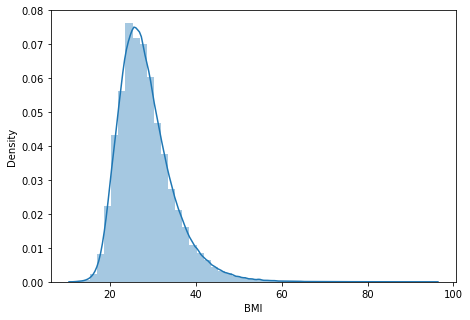

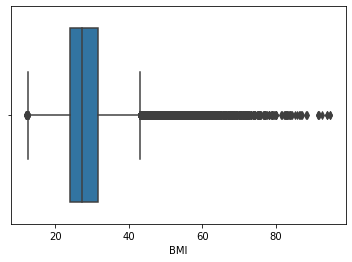

In [19]:
detectOutliers("BMI")

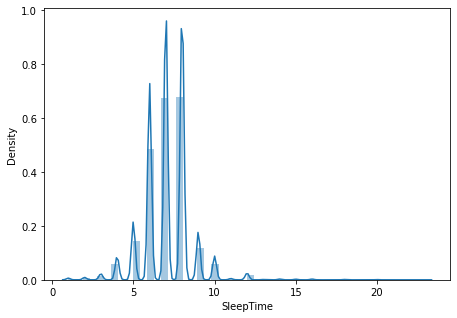

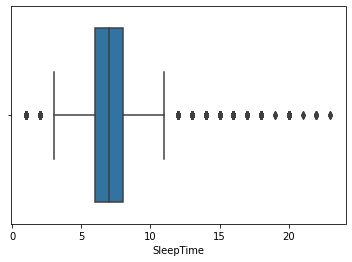

In [20]:
detectOutliers("SleepTime")

In [21]:
array=['BMI','SleepTime']

In [22]:
#function to remove outliers
def removeOutliers(data,g):
    for i in g:
        percentile25 = data[i].quantile(0.25)
        percentile75 = data[i].quantile(0.75)
        iqr=percentile75-percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        data=data[(data[i]>lower_limit)&(data[i]<upper_limit)]
    return data        

In [23]:
data=removeOutliers(data,array)

In [24]:
data

HeartDisease    BMI Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0                No  16.60     Yes              No     No          No  Female   
1                No  20.34      No              No    Yes          No  Female   
2                No  26.58     Yes              No     No          No    Male   
3                No  24.21      No              No     No          No  Female   
4                No  23.71      No              No     No         Yes  Female   
...             ...    ...     ...             ...    ...         ...     ...   
319788           No  23.38      No              No     No          No  Female   
319789           No  22.22      No              No     No          No  Female   
319790          Yes  27.41     Yes              No     No         Yes    Male   
319791           No  29.84     Yes              No     No          No    Male   
319792           No  24.24      No              No     No          No  Female   

        AgeCategory      Race Diabetic PhysicalActivity  GenHealth  SleepTime  \
0             55-59     White      Yes              Yes  Very good        5.0   
1       80 or older     White       No              Yes  Very good        7.0   
2             65-69     White      Yes              Yes       Fair        8.0   
3             75-79     White       No               No       Good        6.0   
4             40-44     White       No              Yes  Very good        8.0   
...             ...       ...      ...              ...        ...        ...   
319788        60-64  Hispanic       No              Yes  Excellent        6.0   
319789        18-24  Hispanic       No              Yes  Excellent        8.0   
319790        60-64  Hispanic      Yes               No       Fair        6.0   
319791        35-39  Hispanic       No              Yes  Very good        5.0   
319792        45-49  Hispanic       No              Yes       Good        6.0   

       Asthma KidneyDisease SkinCancer  
0         Yes            No        Yes  
1          No            No         No  
2         Yes            No         No  
3          No            No        Yes  
4          No            No         No  
...       ...           ...        ...  
319788     No            No         No  
319789     No            No         No  
319790    Yes            No         No  
319791    Yes            No         No  
319792     No            No         No  

[286216 rows x 16 columns]

**There are about 25000 rows have been removed as they are outliers**

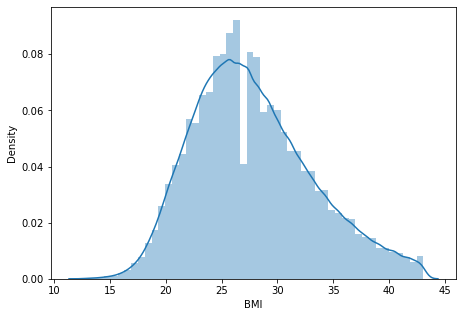

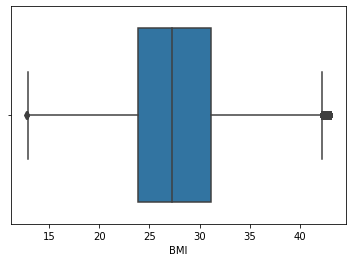

In [25]:
detectOutliers("BMI")

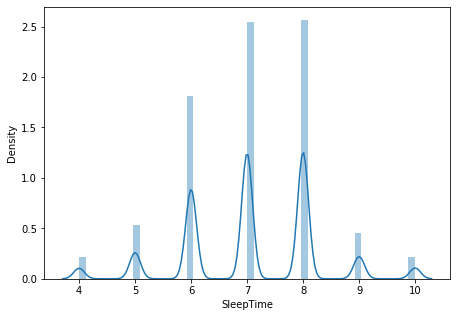

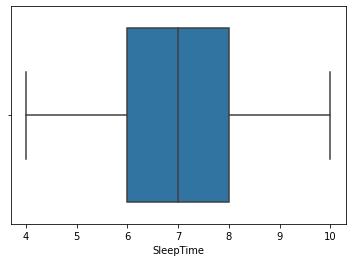

In [26]:
detectOutliers("SleepTime")

**All data is in range as shown in both figures**

In [27]:
arr=['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
#encoding binary attributes 
def encode(data):
    for i in arr:
        df = pd.get_dummies(data[i])
        if i =='Sex':
            data[i]=df['Male']
        else:
            data[i]=df['Yes']  
    return data
            
encode(data)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0                  0  16.60        1                0       0            0   
1                  0  20.34        0                0       1            0   
2                  0  26.58        1                0       0            0   
3                  0  24.21        0                0       0            0   
4                  0  23.71        0                0       0            1   
...              ...    ...      ...              ...     ...          ...   
319788             0  23.38        0                0       0            0   
319789             0  22.22        0                0       0            0   
319790             1  27.41        1                0       0            1   
319791             0  29.84        1                0       0            0   
319792             0  24.24        0                0       0            0   

        Sex  AgeCategory      Race  Diabetic  PhysicalActivity  GenHealth  \
0         0        55-59     White         1                 1  Very good   
1         0  80 or older     White         0                 1  Very good   
2         1        65-69     White         1                 1       Fair   
3         0        75-79     White         0                 0       Good   
4         0        40-44     White         0                 1  Very good   
...     ...          ...       ...       ...               ...        ...   
319788    0        60-64  Hispanic         0                 1  Excellent   
319789    0        18-24  Hispanic         0                 1  Excellent   
319790    1        60-64  Hispanic         1                 0       Fair   
319791    1        35-39  Hispanic         0                 1  Very good   
319792    0        45-49  Hispanic         0                 1       Good   

        SleepTime  Asthma  KidneyDisease  SkinCancer  
0             5.0       1              0           1  
1             7.0       0              0           0  
2             8.0       1              0           0  
3             6.0       0              0           1  
4             8.0       0              0           0  
...           ...     ...            ...         ...  
319788        6.0       0              0           0  
319789        8.0       0              0           0  
319790        6.0       1              0           0  
319791        5.0       1              0           0  
319792        6.0       0              0           0  

[286216 rows x 16 columns]

In [28]:
#Checking for values of  GenHealth attribute
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [29]:
#encoding Ordinal Attribute
dataMapping={
    'Poor': 1,
    'Fair' : 2,
    'Good' : 3,
    'Very good': 4,
    'Excellent' :5
}
data['GenHealth']=data['GenHealth'].map(dataMapping)

In [30]:
data

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0                  0  16.60        1                0       0            0   
1                  0  20.34        0                0       1            0   
2                  0  26.58        1                0       0            0   
3                  0  24.21        0                0       0            0   
4                  0  23.71        0                0       0            1   
...              ...    ...      ...              ...     ...          ...   
319788             0  23.38        0                0       0            0   
319789             0  22.22        0                0       0            0   
319790             1  27.41        1                0       0            1   
319791             0  29.84        1                0       0            0   
319792             0  24.24        0                0       0            0   

        Sex  AgeCategory      Race  Diabetic  PhysicalActivity  GenHealth  \
0         0        55-59     White         1                 1          4   
1         0  80 or older     White         0                 1          4   
2         1        65-69     White         1                 1          2   
3         0        75-79     White         0                 0          3   
4         0        40-44     White         0                 1          4   
...     ...          ...       ...       ...               ...        ...   
319788    0        60-64  Hispanic         0                 1          5   
319789    0        18-24  Hispanic         0                 1          5   
319790    1        60-64  Hispanic         1                 0          2   
319791    1        35-39  Hispanic         0                 1          4   
319792    0        45-49  Hispanic         0                 1          3   

        SleepTime  Asthma  KidneyDisease  SkinCancer  
0             5.0       1              0           1  
1             7.0       0              0           0  
2             8.0       1              0           0  
3             6.0       0              0           1  
4             8.0       0              0           0  
...           ...     ...            ...         ...  
319788        6.0       0              0           0  
319789        8.0       0              0           0  
319790        6.0       1              0           0  
319791        5.0       1              0           0  
319792        6.0       0              0           0  

[286216 rows x 16 columns]

In [31]:
#showing race values
arr=data['Race'].unique()
arr

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [32]:
#encoding nominal attributes
data['Race']=data['Race'].replace(arr,[0,1,2,3,4,5])
data

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0                  0  16.60        1                0       0            0   
1                  0  20.34        0                0       1            0   
2                  0  26.58        1                0       0            0   
3                  0  24.21        0                0       0            0   
4                  0  23.71        0                0       0            1   
...              ...    ...      ...              ...     ...          ...   
319788             0  23.38        0                0       0            0   
319789             0  22.22        0                0       0            0   
319790             1  27.41        1                0       0            1   
319791             0  29.84        1                0       0            0   
319792             0  24.24        0                0       0            0   

        Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0         0        55-59     0         1                 1          4   
1         0  80 or older     0         0                 1          4   
2         1        65-69     0         1                 1          2   
3         0        75-79     0         0                 0          3   
4         0        40-44     0         0                 1          4   
...     ...          ...   ...       ...               ...        ...   
319788    0        60-64     5         0                 1          5   
319789    0        18-24     5         0                 1          5   
319790    1        60-64     5         1                 0          2   
319791    1        35-39     5         0                 1          4   
319792    0        45-49     5         0                 1          3   

        SleepTime  Asthma  KidneyDisease  SkinCancer  
0             5.0       1              0           1  
1             7.0       0              0           0  
2             8.0       1              0           0  
3             6.0       0              0           1  
4             8.0       0              0           0  
...           ...     ...            ...         ...  
319788        6.0       0              0           0  
319789        8.0       0              0           0  
319790        6.0       1              0           0  
319791        5.0       1              0           0  
319792        6.0       0              0           0  

[286216 rows x 16 columns]

In [33]:
arr=data['AgeCategory'].unique()
arr

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [34]:
#Replacing age category values with logical numerical values to be used in calculations
data["AgeCategory"].replace({"55-59": 57, "80 or older": 95,'65-69':66,'75-79':77,'40-44':43,'70-74':72,'60-64':63,'50-54':53,'45-49':48,'18-24':20,'35-39':38,'30-34':33,'25-29':29}, inplace=True)

In [35]:
data

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0                  0  16.60        1                0       0            0   
1                  0  20.34        0                0       1            0   
2                  0  26.58        1                0       0            0   
3                  0  24.21        0                0       0            0   
4                  0  23.71        0                0       0            1   
...              ...    ...      ...              ...     ...          ...   
319788             0  23.38        0                0       0            0   
319789             0  22.22        0                0       0            0   
319790             1  27.41        1                0       0            1   
319791             0  29.84        1                0       0            0   
319792             0  24.24        0                0       0            0   

        Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0         0           57     0         1                 1          4   
1         0           95     0         0                 1          4   
2         1           66     0         1                 1          2   
3         0           77     0         0                 0          3   
4         0           43     0         0                 1          4   
...     ...          ...   ...       ...               ...        ...   
319788    0           63     5         0                 1          5   
319789    0           20     5         0                 1          5   
319790    1           63     5         1                 0          2   
319791    1           38     5         0                 1          4   
319792    0           48     5         0                 1          3   

        SleepTime  Asthma  KidneyDisease  SkinCancer  
0             5.0       1              0           1  
1             7.0       0              0           0  
2             8.0       1              0           0  
3             6.0       0              0           1  
4             8.0       0              0           0  
...           ...     ...            ...         ...  
319788        6.0       0              0           0  
319789        8.0       0              0           0  
319790        6.0       1              0           0  
319791        5.0       1              0           0  
319792        6.0       0              0           0  

[286216 rows x 16 columns]

Text(0.5, 1.0, 'Correlation Matrix')

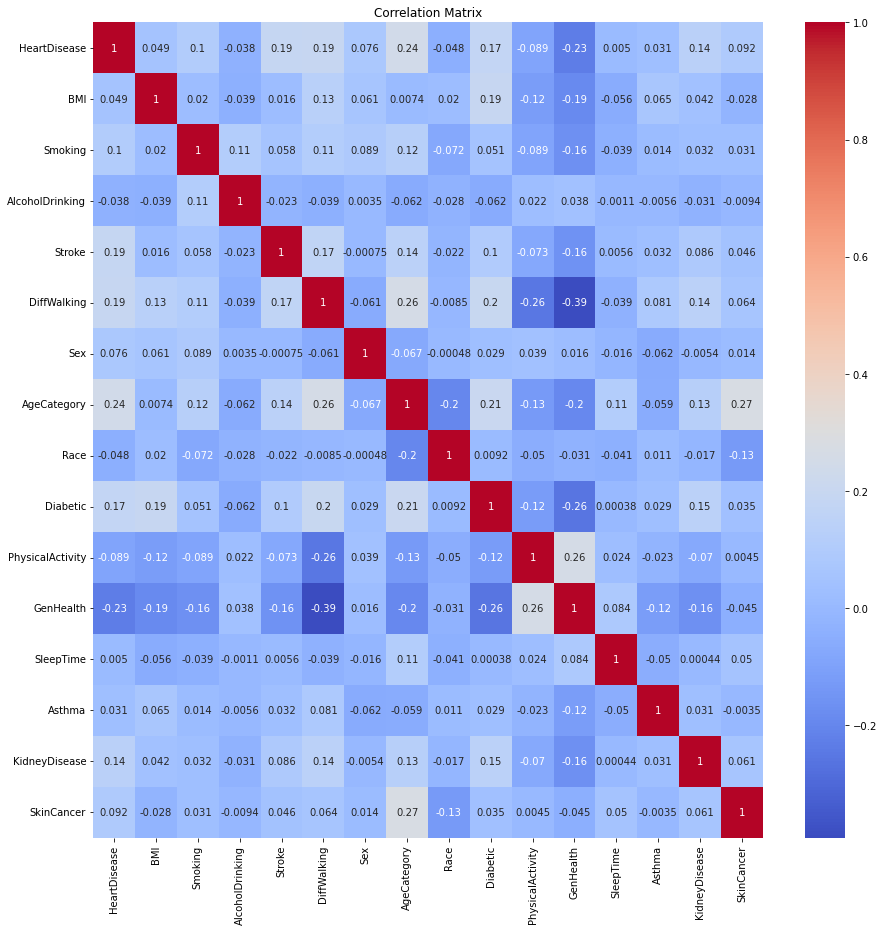

In [36]:
#correaltion Matrix
plt.figure(figsize=(15,15))
snb.heatmap(data.corr(), annot=True, cmap="coolwarm").set_title('Correlation Matrix')

**There's No Attributes With Correlation rate Greater than or equal 0.8 for +ve correlation**

**There's No Attributes With Correlation rate less than or equal -0.8 for -ve correlation**

**So no attributes need to be removed**



<a id='eda'></a>
# Exploratory Data Analysis

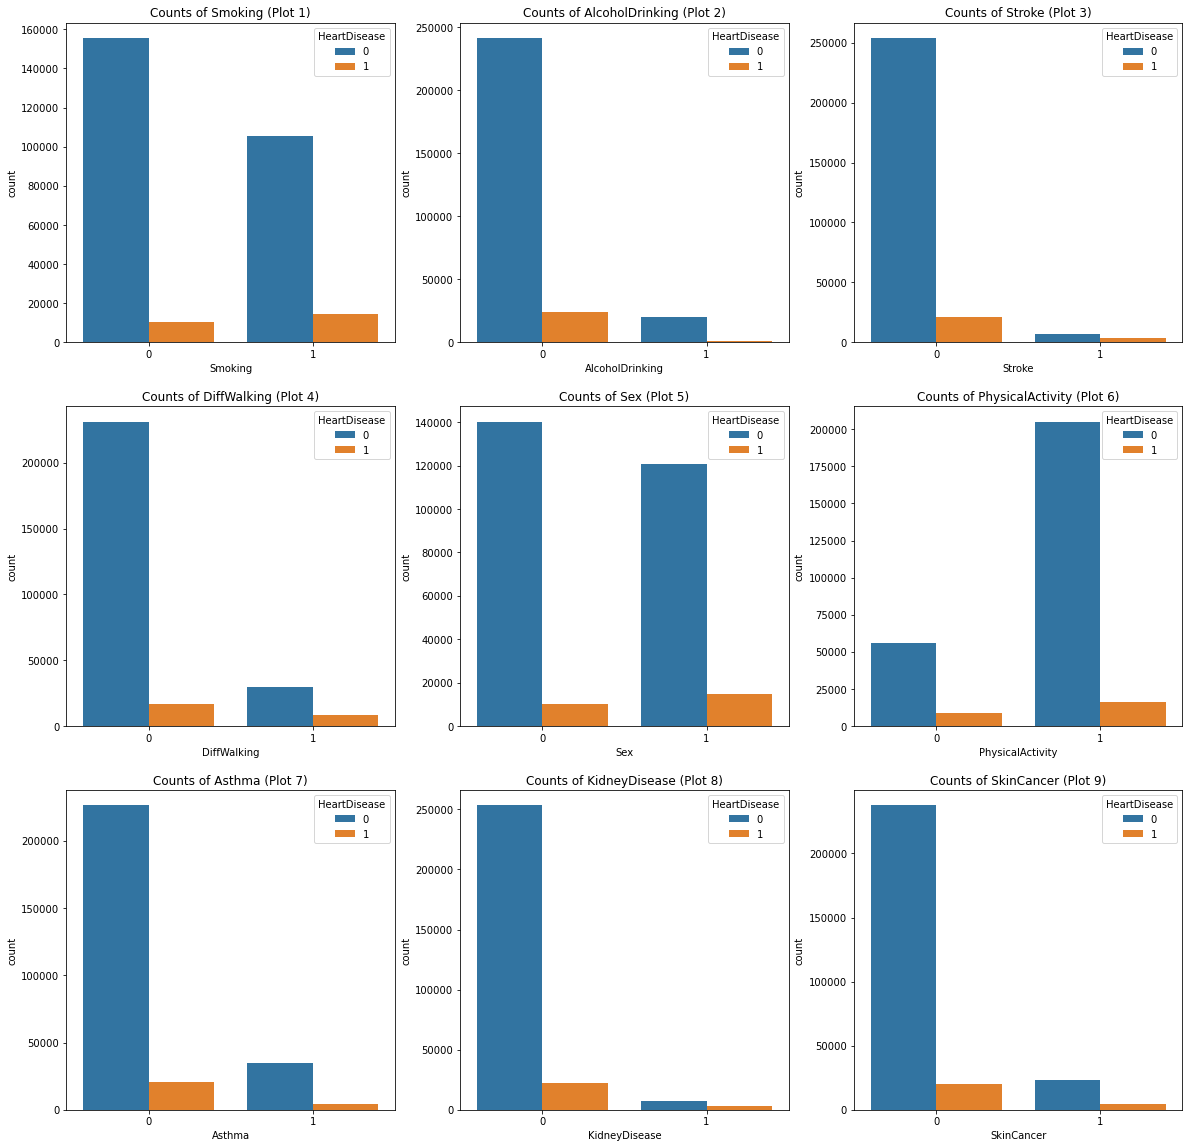

In [37]:
#General look
#This list of lists contains all the columns which have binary categorical values
colRange = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]
#This function prints the countplots counting the number of people in each category
def printCount(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    row=0
    col=0
    p_count=1
    for row in range(3):
        for col in range(3):
            #reads column name from the list
            column = colRange[row][col]
            #plots the counts of the particular column
            snb.countplot(ax=axes[row,col],x=data[column],hue=data['HeartDisease'])
            #sets the title of the corresponding plot along with plot number
            axes[row,col].set_title("Counts of {} (Plot {})".format(column,p_count))
            p_count += 1
#Calling the function
printCount(colRange)

**General Observations**

Plot 1 : According to the plot people who smoke have a higher chance of Heart Diseases than people who don't

Plot 2 : According to the plot people who do not drink alcohol have a lower of Heart Disease

Plot 3 : According to the plot people having Heart Disease have a lower chance of having a Stroke

Plot 4 : According to the plot people who do not have any difficulty in walking have a lower chance of Heart Disease

Plot 5 : According to the plot Males have a higher chance of Heart Disease than Females

Plot 6 : According to the plot People who participate in Physical Activity cause Heart Diseases

Plot 7 : According to the plot People who have asthma have a lower chance of Heart Disease

Plot 8 : People who have kidney diseases have low chance of having heart diseases.

plot 9 : People who have skin cancer have low chance of having heart diseases.


Text(0.5, 1.0, 'Variation of Heart Disease amoung Races')

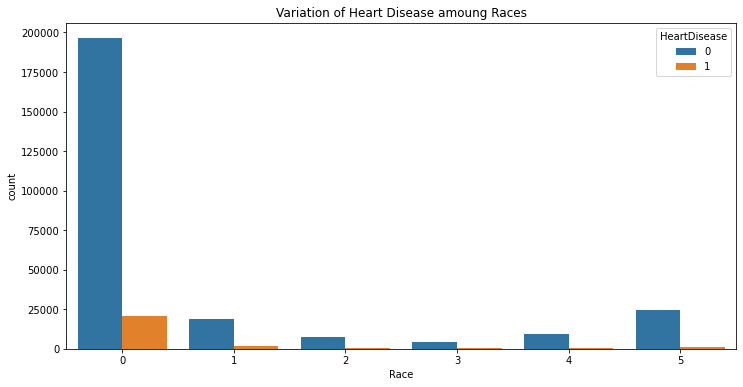

In [38]:
#Checking heart Disease among races
plt.figure(figsize=(12,6))
snb.countplot(data['Race'],hue=data['HeartDisease'])
plt.title('Variation of Heart Disease amoung Races')

**As 0 stands for white people...white people are more likely to have heart diseases**

Text(0.5, 1.0, 'Variation of Heart Disease among Diabetic People')

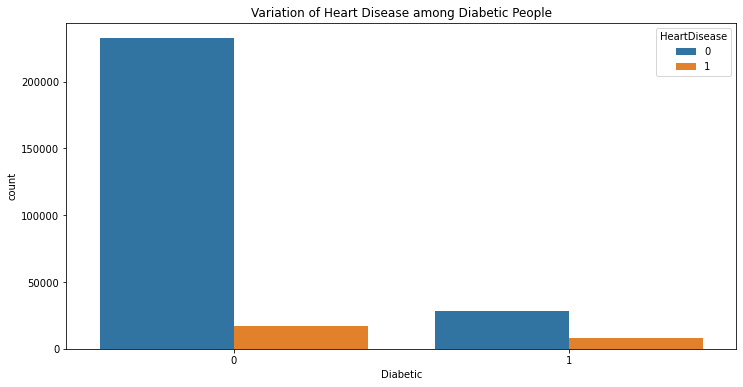

In [39]:
#checking heart diseases for diabetic people
plt.figure(figsize=(12,6))
snb.countplot(data['Diabetic'],hue=data['HeartDisease'])
plt.title('Variation of Heart Disease among Diabetic People')

**people who don't suffer from diabetes have higher risk of heart diseases**

Text(0.5, 1.0, 'Variation of Heart Disease compared to genhealth')

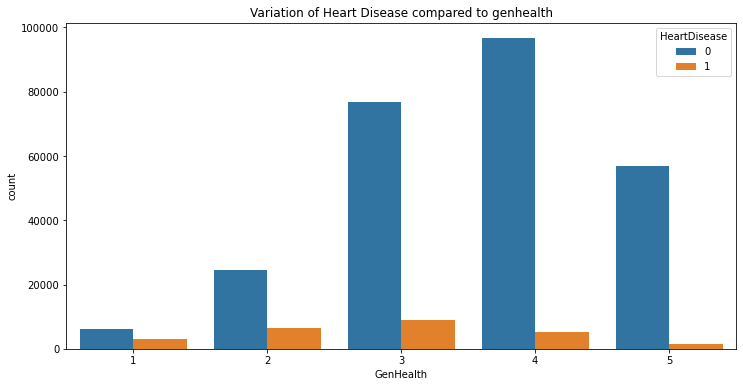

In [40]:
#checking heart diseases compared to general health
plt.figure(figsize=(12,6))
snb.countplot(data['GenHealth'],hue=data['HeartDisease'])
plt.title('Variation of Heart Disease compared to genhealth')

**People ranked with above good health have the lowest chance of heart diseases**

Text(0.5, 1.0, 'Variation of Heart Disease compared to Age')

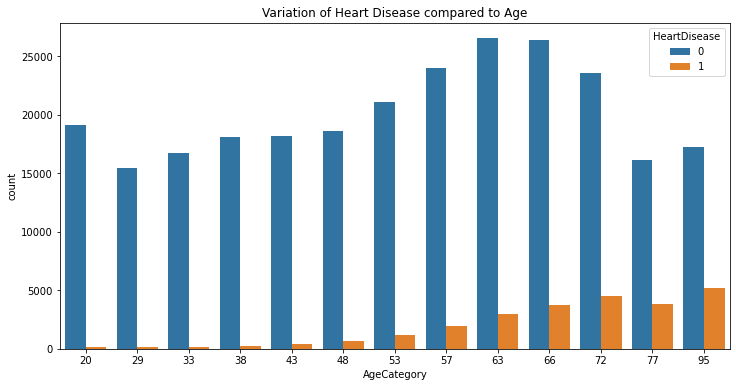

In [41]:
#checking heart diseases compared to Age
plt.figure(figsize=(12,6))
snb.countplot(data['AgeCategory'],hue=data['HeartDisease'])
plt.title('Variation of Heart Disease compared to Age')

**-People above 80 are more likely to have heart diseases**

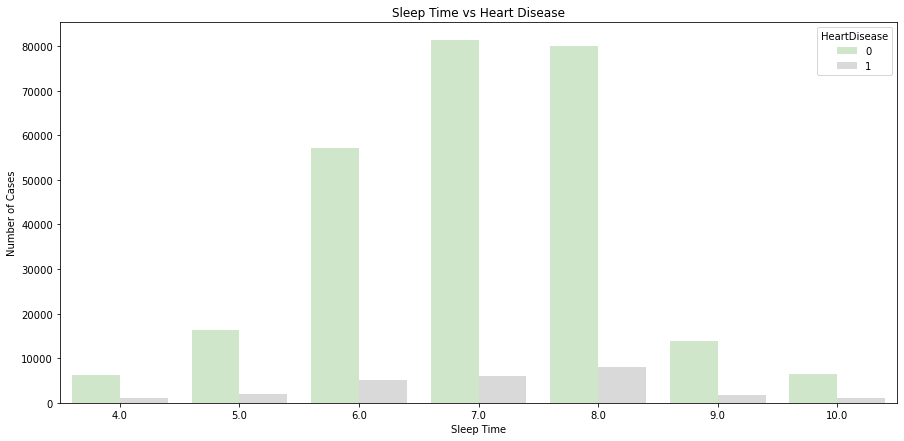

In [42]:
#Heart disease compared to sleep time factor
snb.set_palette('Set3_r')
plt.figure(figsize=(15,7))
snb.countplot(data=data, x='SleepTime', hue='HeartDisease')
plt.title('Sleep Time vs Heart Disease')
plt.xlabel('Sleep Time')
plt.ylabel('Number of Cases')
plt.show()

**Seems like 7 hours of sleeping is the better for your health**

In [43]:
data.describe()

HeartDisease            BMI        Smoking  AlcoholDrinking  \
count  286216.000000  286216.000000  286216.000000    286216.000000   
mean        0.087822      27.813980       0.419903         0.072494   
std         0.283036       5.375851       0.493544         0.259305   
min         0.000000      12.650000       0.000000         0.000000   
25%         0.000000      23.830000       0.000000         0.000000   
50%         0.000000      27.260000       0.000000         0.000000   
75%         0.000000      31.180000       1.000000         0.000000   
max         1.000000      43.070000       1.000000         1.000000   

              Stroke    DiffWalking            Sex    AgeCategory  \
count  286216.000000  286216.000000  286216.000000  286216.000000   
mean        0.038359       0.134136       0.474411      55.932677   
std         0.192062       0.340799       0.499346      19.631670   
min         0.000000       0.000000       0.000000      20.000000   
25%         0.000000       0.000000       0.000000      43.000000   
50%         0.000000       0.000000       0.000000      57.000000   
75%         0.000000       0.000000       1.000000      66.000000   
max         1.000000       1.000000       1.000000      95.000000   

                Race       Diabetic  PhysicalActivity      GenHealth  \
count  286216.000000  286216.000000     286216.000000  286216.000000   
mean        0.766456       0.127079          0.774314       3.591648   
std         1.596910       0.333062          0.418034       1.029387   
min         0.000000       0.000000          0.000000       1.000000   
25%         0.000000       0.000000          1.000000       3.000000   
50%         0.000000       0.000000          1.000000       4.000000   
75%         0.000000       0.000000          1.000000       4.000000   
max         5.000000       1.000000          1.000000       5.000000   

           SleepTime         Asthma  KidneyDisease     SkinCancer  
count  286216.000000  286216.000000  286216.000000  286216.000000  
mean        7.073445       0.136282       0.037266       0.098621  
std         1.206666       0.343088       0.189412       0.298153  
min         4.000000       0.000000       0.000000       0.000000  
25%         6.000000       0.000000       0.000000       0.000000  
50%         7.000000       0.000000       0.000000       0.000000  
75%         8.000000       0.000000       0.000000       0.000000  
max        10.000000       1.000000       1.000000       1.000000

In [44]:
discretizer  = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data['discreteBMI'] = discretizer.fit_transform(data['BMI'].values.reshape(-1,1)).astype(int)

In [45]:
data['discreteBMI'].unique()

array([0, 1, 2, 3, 4])

In [46]:
dataMapping={
    0:'Under Weight' ,
    1 : 'Normal',
    2: 'Over Weight',
    3: 'Obese',
    4 :'Extremely Obese'
}
data['discreteBMI']=data['discreteBMI'].map(dataMapping)

In [47]:
data

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0                  0  16.60        1                0       0            0   
1                  0  20.34        0                0       1            0   
2                  0  26.58        1                0       0            0   
3                  0  24.21        0                0       0            0   
4                  0  23.71        0                0       0            1   
...              ...    ...      ...              ...     ...          ...   
319788             0  23.38        0                0       0            0   
319789             0  22.22        0                0       0            0   
319790             1  27.41        1                0       0            1   
319791             0  29.84        1                0       0            0   
319792             0  24.24        0                0       0            0   

        Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0         0           57     0         1                 1          4   
1         0           95     0         0                 1          4   
2         1           66     0         1                 1          2   
3         0           77     0         0                 0          3   
4         0           43     0         0                 1          4   
...     ...          ...   ...       ...               ...        ...   
319788    0           63     5         0                 1          5   
319789    0           20     5         0                 1          5   
319790    1           63     5         1                 0          2   
319791    1           38     5         0                 1          4   
319792    0           48     5         0                 1          3   

        SleepTime  Asthma  KidneyDisease  SkinCancer   discreteBMI  
0             5.0       1              0           1  Under Weight  
1             7.0       0              0           0        Normal  
2             8.0       1              0           0   Over Weight  
3             6.0       0              0           1        Normal  
4             8.0       0              0           0        Normal  
...           ...     ...            ...         ...           ...  
319788        6.0       0              0           0        Normal  
319789        8.0       0              0           0        Normal  
319790        6.0       1              0           0   Over Weight  
319791        5.0       1              0           0   Over Weight  
319792        6.0       0              0           0        Normal  

[286216 rows x 17 columns]

In [48]:
discretizer  = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
data['discreteST'] = discretizer.fit_transform(data['SleepTime'].values.reshape(-1,1)).astype(int)

In [49]:
data['discreteST'].unique()

array([1, 3, 4, 2, 0, 5, 6])

In [50]:
dataMapping={
    0:'Very Low' ,
    1 : 'Low',
    2: 'Good',
    3: 'Excellent',
    4 :'Very good',
    5 : 'Low',
    6 :'Very Low'
}
data['discreteST']=data['discreteST'].map(dataMapping)

In [51]:
data

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0                  0  16.60        1                0       0            0   
1                  0  20.34        0                0       1            0   
2                  0  26.58        1                0       0            0   
3                  0  24.21        0                0       0            0   
4                  0  23.71        0                0       0            1   
...              ...    ...      ...              ...     ...          ...   
319788             0  23.38        0                0       0            0   
319789             0  22.22        0                0       0            0   
319790             1  27.41        1                0       0            1   
319791             0  29.84        1                0       0            0   
319792             0  24.24        0                0       0            0   

        Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0         0           57     0         1                 1          4   
1         0           95     0         0                 1          4   
2         1           66     0         1                 1          2   
3         0           77     0         0                 0          3   
4         0           43     0         0                 1          4   
...     ...          ...   ...       ...               ...        ...   
319788    0           63     5         0                 1          5   
319789    0           20     5         0                 1          5   
319790    1           63     5         1                 0          2   
319791    1           38     5         0                 1          4   
319792    0           48     5         0                 1          3   

        SleepTime  Asthma  KidneyDisease  SkinCancer   discreteBMI discreteST  
0             5.0       1              0           1  Under Weight        Low  
1             7.0       0              0           0        Normal  Excellent  
2             8.0       1              0           0   Over Weight  Very good  
3             6.0       0              0           1        Normal       Good  
4             8.0       0              0           0        Normal  Very good  
...           ...     ...            ...         ...           ...        ...  
319788        6.0       0              0           0        Normal       Good  
319789        8.0       0              0           0        Normal  Very good  
319790        6.0       1              0           0   Over Weight       Good  
319791        5.0       1              0           0   Over Weight        Low  
319792        6.0       0              0           0        Normal       Good  

[286216 rows x 18 columns]

<a id='train'></a>
# Training and Testing
>**Algorithms**: 
            <li><a href="#KNN">K Nearest Neighbors Algorithm </a></li>
            <li><a href="#DT"> Decision Tree Algorithm </a></li>
            <li><a href="#Naive"> Naive Bayes </a></li>
            <li><a href="#LR"> Logistic Regression </a></li>


In [52]:
#importing MinMax function to normalize data
from sklearn.preprocessing import MinMaxScaler

 <a id='KNN'></a>
#### K Nearest Neighbors Algorithm

In [53]:
#dividing data into features (x) and target (y)
y=data.HeartDisease
x=data.iloc[:,1:16]

In [54]:
#normalizing data
scaler = MinMaxScaler()
names = x.columns
d = scaler.fit_transform(x)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0       0.129849      1.0              0.0     0.0          0.0  0.0   
1       0.252794      0.0              0.0     1.0          0.0  0.0   
2       0.457922      1.0              0.0     0.0          0.0  1.0   
3       0.380013      0.0              0.0     0.0          0.0  0.0   
4       0.363577      0.0              0.0     0.0          1.0  0.0   
...          ...      ...              ...     ...          ...  ...   
286211  0.352728      0.0              0.0     0.0          0.0  0.0   
286212  0.314596      0.0              0.0     0.0          0.0  0.0   
286213  0.485207      1.0              0.0     0.0          1.0  1.0   
286214  0.565089      1.0              0.0     0.0          0.0  1.0   
286215  0.380999      0.0              0.0     0.0          0.0  0.0   

        AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  SleepTime  \
0          0.493333   0.0       1.0               1.0       0.75   0.166667   
1          1.000000   0.0       0.0               1.0       0.75   0.500000   
2          0.613333   0.0       1.0               1.0       0.25   0.666667   
3          0.760000   0.0       0.0               0.0       0.50   0.333333   
4          0.306667   0.0       0.0               1.0       0.75   0.666667   
...             ...   ...       ...               ...        ...        ...   
286211     0.573333   1.0       0.0               1.0       1.00   0.333333   
286212     0.000000   1.0       0.0               1.0       1.00   0.666667   
286213     0.573333   1.0       1.0               0.0       0.25   0.333333   
286214     0.240000   1.0       0.0               1.0       0.75   0.166667   
286215     0.373333   1.0       0.0               1.0       0.50   0.333333   

        Asthma  KidneyDisease  SkinCancer  
0          1.0            0.0         1.0  
1          0.0            0.0         0.0  
2          1.0            0.0         0.0  
3          0.0            0.0         1.0  
4          0.0            0.0         0.0  
...        ...            ...         ...  
286211     0.0            0.0         0.0  
286212     0.0            0.0         0.0  
286213     1.0            0.0         0.0  
286214     1.0            0.0         0.0  
286215     0.0            0.0         0.0  

[286216 rows x 15 columns]

In [55]:
#importing required libraries for the algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score

In [56]:
#splitting data into training and test data with ratio 8:2 (train:test)
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

In [57]:
X_train.to_csv(r"E:\Data Mining train&test data sets\x_train.csv")

In [58]:
X_test.to_csv(r"E:\Data Mining train&test data sets\x_test.csv")

In [59]:
y_test.to_csv(r"E:\Data Mining train&test data sets\y_test.csv")

In [60]:
y_train.to_csv(r"E:\Data Mining train&test data sets\y_train.csv")

In [61]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319788    0
319789    0
319790    1
319791    0
319792    0
Name: HeartDisease, Length: 286216, dtype: uint8

In [62]:
x

BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0       16.60        1                0       0            0    0   
1       20.34        0                0       1            0    0   
2       26.58        1                0       0            0    1   
3       24.21        0                0       0            0    0   
4       23.71        0                0       0            1    0   
...       ...      ...              ...     ...          ...  ...   
319788  23.38        0                0       0            0    0   
319789  22.22        0                0       0            0    0   
319790  27.41        1                0       0            1    1   
319791  29.84        1                0       0            0    1   
319792  24.24        0                0       0            0    0   

        AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  SleepTime  \
0                57     0         1                 1          4        5.0   
1                95     0         0                 1          4        7.0   
2                66     0         1                 1          2        8.0   
3                77     0         0                 0          3        6.0   
4                43     0         0                 1          4        8.0   
...             ...   ...       ...               ...        ...        ...   
319788           63     5         0                 1          5        6.0   
319789           20     5         0                 1          5        8.0   
319790           63     5         1                 0          2        6.0   
319791           38     5         0                 1          4        5.0   
319792           48     5         0                 1          3        6.0   

        Asthma  KidneyDisease  SkinCancer  
0            1              0           1  
1            0              0           0  
2            1              0           0  
3            0              0           1  
4            0              0           0  
...        ...            ...         ...  
319788       0              0           0  
319789       0              0           0  
319790       1              0           0  
319791       1              0           0  
319792       0              0           0  

[286216 rows x 15 columns]

In [63]:
X_train

BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
152437  21.79        0                0       0            0    0   
90603   33.15        1                0       0            0    1   
215091  40.89        0                0       0            0    1   
312023  22.81        0                0       0            0    0   
242260  30.81        1                0       0            0    1   
...       ...      ...              ...     ...          ...  ...   
129647  19.26        1                0       0            1    0   
288673  34.33        0                0       0            0    0   
143157  21.77        0                0       0            0    1   
160067  35.61        0                0       0            0    0   
131965  26.31        1                0       0            0    1   

        AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  SleepTime  \
152437           33     0         0                 1          4        7.0   
90603            66     0         1                 1          3        8.0   
215091           63     0         0                 1          3        8.0   
312023           72     0         0                 1          4        8.0   
242260           77     1         1                 0          1        7.0   
...             ...   ...       ...               ...        ...        ...   
129647           33     0         0                 1          3        8.0   
288673           43     0         0                 1          3        4.0   
143157           43     4         0                 1          5        7.0   
160067           63     0         0                 0          4        7.0   
131965           38     0         0                 1          5        7.0   

        Asthma  KidneyDisease  SkinCancer  
152437       1              0           0  
90603        0              0           1  
215091       0              0           0  
312023       0              0           0  
242260       0              0           0  
...        ...            ...         ...  
129647       0              0           0  
288673       0              0           0  
143157       0              0           0  
160067       0              0           0  
131965       0              0           0  

[228972 rows x 15 columns]

Accuracy: 

90.7081964922088

Confusion Matrix
 


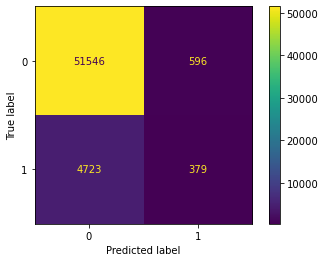

In [64]:
# declaring a object of K Neighbors Classifier class
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print("Accuracy: \n")
knnacc=accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1)*100)
print()
print("Confusion Matrix\n ")
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels= np.asarray([0,1])) 
disp.plot()

In [65]:
print(f'model: {str(knn)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred1)}')
print(f'Precission_score: {precision_score(y_test,y_pred1)}')
print(f'Recall_score: {recall_score(y_test,y_pred1)}')
print( '\n')

model: KNeighborsClassifier(n_neighbors=7)
Accuracy_score: 0.9070819649220879
Precission_score: 0.38871794871794874
Recall_score: 0.07428459427675421




**First: the code printed the confusion matrix which is compares the actual target values with those predicted by the KNN algorithm**

-TN (True NoHeartDisease): 51546 (Values that actually havenot heart diseases)

-FP (False HeartDisease): 596 (represents the number of misclassified patients with the disease but actually they are healthy)

-TP (True HeartDisease): 379 (Number of patients which are truely predicted with heart disease)

-FN (False NoHeartDisease): 4723 (Number of patients misclassified as healthy but actually they are suffering from the disease)

-------------------------------------------------------------------------------------------------------------------------------
-Accuarcy= (TP+TN)/(TP+TN+FP+FN)

-Precision score = (TP)/(TP+FP)...... Ratio of correctly classified patients with the disease (TP) to the total patients predicted to have the disease (TP+FP)

-Recall score = (TP)/(TP+FN).......Ratio of correctly classified diseased patients (TP) divided by total number of patients who have actually the disease


<a id='DT'></a>
### Decision Tree Algorithm

In [66]:
#importing required Libraries
from sklearn.tree import DecisionTreeClassifier

Accuracy: 

90.98944867584376

Confusion Matrix
 


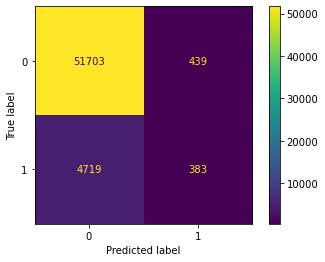

In [67]:
# declaring a object of Decision Tree Classifier class
# entropy is the criterion for calculating information gain
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
print("Accuracy: \n")
dt=accuracy_score(y_test,y_pred2)
print(accuracy_score(y_test,y_pred2)*100)
print()
print("Confusion Matrix\n ")
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels= np.asarray([0,1])) 
disp.plot()

**First: the code printed the confusion matrix which is compares the actual target values with those predicted by the KNN algorithm**

-TN (True NoHeartDisease): 48289 (Values that actually havenot heart diseases)

-FP (False HeartDisease): 3853 (represents the number of misclassified patients with the disease but actually they are healthy)

-TP (True HeartDisease): 1216 (Number of patients which are truely predicted with heart disease)

-FN (False NoHeartDisease): 3886 (Number of patients misclassified as healthy but actually they are suffering from the disease)

 <a id='Naive'></a>
### Naive Bayes

In [68]:
#Importing Naive bayes function
from sklearn.naive_bayes import GaussianNB

In [69]:
# declaring a object of GaussianNB class
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred3)
naive=accuracy_score(y_test,y_pred3)
print(cm3)
print(accuracy_score(y_test,y_pred3)*100)

[[46470  5672]
 [ 2808  2294]]
85.18622038990986


<AxesSubplot:>

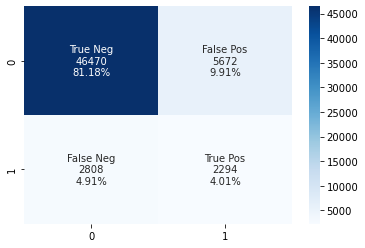

In [70]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm3.flatten()/np.sum(cm3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
snb.heatmap(cm3, annot=labels, fmt='', cmap='Blues')

**First: the code printed the confusion matrix which is compares the actual target values with those predicted by the KNN algorithm**

-TN (True NoHeartDisease): 46470 (Values that actually havenot heart diseases)

-FP (False HeartDisease): 5672 (represents the number of misclassified patients with the disease but actually they are healthy)

-TP (True HeartDisease): 2294 (Number of patients which are truely predicted with heart disease)

-FN (False NoHeartDisease): 2808 (Number of patients misclassified as healthy but actually they are suffering from the disease)

<a id='LR'></a>
### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
# declaring a object of Logistic regression class
clf4 = LogisticRegression()

# fit() function trains the model
# fitting the object with the training data
clf4.fit(X_train, y_train)

# predict() function predicts results from validation data
# predicting result using the trained data
y_pred4 = clf4.predict(X_test)

# confusion_matrix() gives the true_positives, false positives, true negatives, false negatives
# making confusion matrix using predicted and given results in validation data
cm4=confusion_matrix(y_test,y_pred4)

# printing the confusion matrix
print(cm4)

# accuracy_score() is used to find the accuracy of the model
print(accuracy_score(y_test,y_pred4)*100)


[[51726   416]
 [ 4645   457]]
91.15889874921389


<AxesSubplot:>

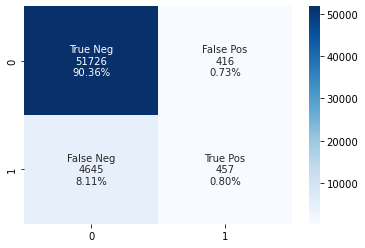

In [73]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm4.flatten()/np.sum(cm4)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
snb.heatmap(cm4, annot=labels, fmt='', cmap='Blues')

**First: the code printed the confusion matrix which is compares the actual target values with those predicted by the KNN algorithm**

-TN (True NoHeartDisease): 51726 (Values that actually havenot heart diseases)

-FP (False HeartDisease): 416 (represents the number of misclassified patients with the disease but actually they are healthy)

-TP (True HeartDisease): 457 (Number of patients which are truely predicted with heart disease)

-FN (False NoHeartDisease): 4645 (Number of patients misclassified as healthy but actually they are suffering from the disease)